# Data Setup

In [ ]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 7)

In [ ]:
df = pd.read_csv('gtd2.csv')


<ipython-input-2-ab1571dfd54f>:1: DtypeWarning: Columns (4,31,33,54,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('gtd2.csv')


In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.shape

(201183, 135)

In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

# Data Pre-processing/cleaning

In [ ]:
df.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    189429
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       172269
Length: 135, dtype: int64

In [ ]:
us_df = df.loc[df["country"] == 217]

In [ ]:
us_df.shape

(3004, 135)

In [ ]:
us_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
us_df.isna().sum()

eventid          0
iyear            0
imonth           0
iday             0
approxdate    2963
              ... 
INT_LOG          0
INT_IDEO         0
INT_MISC         0
INT_ANY          0
related       2464
Length: 135, dtype: int64

In [ ]:
us_df.drop(['eventid','iday','approxdate','extended','country_txt', 'region',
                    'region_txt','latitude','longitude',
            'specificity','vicinity','location','summary','alternative','alternative_txt',
            'multiple','suicide','attacktype2','attacktype2_txt','attacktype3',
            'attacktype3_txt','corp1','target1','natlty1','natlty1_txt','targtype2',
            'targtype2_txt','targsubtype2','targsubtype2_txt','corp2','target2',
            'natlty2','natlty2_txt','targtype3','targtype3_txt','targsubtype3',
            'targsubtype3_txt','corp3','target3','natlty3','natlty3_txt','gsubname',
            'gname2','gsubname2','gname3','gsubname3','motive', 'guncertain1',
            'resolution','country','INT_LOG','INT_IDEO','INT_MISC','INT_ANY',
            'scite1','scite2','scite3','dbsource','related','ransompaidus',
            'weapsubtype4_txt','weapsubtype4','weaptype4_txt','weaptype4',
            'claimmode_txt','claim2','claimmode2','claimmode2_txt','claim3',
            'claimmode3','claimmode3_txt','compclaim',
            'weaptype2','weaptype2_txt','weapsubtype2','weapsubtype2_txt',
            'weaptype3','weaptype3_txt','weapsubtype3','weapsubtype3_txt',
            'guncertain3','divert','ransomamtus','ransompaid','ransomnote',
            'ransomamt','kidhijcountry','ndays','nreleased','guncertain2','nhours',
            'hostkidoutcome_txt','hostkidoutcome','nhostkidus','nhostkid','claimmode',
            'propvalue','propcomment','addnotes','propextent_txt','propextent',
            'nperpcap','claimed','nwoundte','nwoundus','nkillus','ransom','weapdetail',
            'weapsubtype1_txt','weapsubtype1','ishostkid','targsubtype1_txt',
            'nwound','nkill','nkillter','individual','nperps','targtype1_txt',
            'attacktype1_txt','weaptype1_txt','doubtterr'], axis=1, inplace = True)

<ipython-input-11-7f88352d45af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_df.drop(['eventid','iday','approxdate','extended','country_txt', 'region',


In [ ]:
us_df.shape

(3004, 14)

In [ ]:
us_df.isna().sum().sort_values()

iyear             0
imonth            0
provstate         0
city              0
crit1             0
crit2             0
crit3             0
success           0
attacktype1       0
targtype1         0
gname             0
weaptype1         0
property          0
targsubtype1    123
dtype: int64

In [ ]:
us_df.dropna(inplace = True)
us_df.shape

<ipython-input-14-2e20e9711d69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_df.dropna(inplace = True)


(2881, 14)

In [ ]:
us_df.columns

Index(['iyear', 'imonth', 'provstate', 'city', 'crit1', 'crit2', 'crit3',
       'success', 'attacktype1', 'targtype1', 'targsubtype1', 'gname',
       'weaptype1', 'property'],
      dtype='object')

In [ ]:
us_df.dtypes

iyear             int64
imonth            int64
provstate        object
city             object
crit1             int64
crit2             int64
crit3             int64
success           int64
attacktype1       int64
targtype1         int64
targsubtype1    float64
gname            object
weaptype1         int64
property          int64
dtype: object

# Data Understanding/Exploration

In [ ]:
us_df['attacktype1'].value_counts()

3    1325
7     895
2     332
1     131
8      82
5      66
6      22
4      17
9      11
Name: attacktype1, dtype: int64

In [ ]:
us_df['provstate'].value_counts()

In [ ]:
us_df['targtype1'].value_counts()

In [ ]:
sns.countplot(x = 'attacktype1', data = us_df)

In [ ]:
sns.countplot(x = 'attacktype1', hue = 'targtype1', data = us_df)

<Axes: xlabel='targtype1', ylabel='count'>

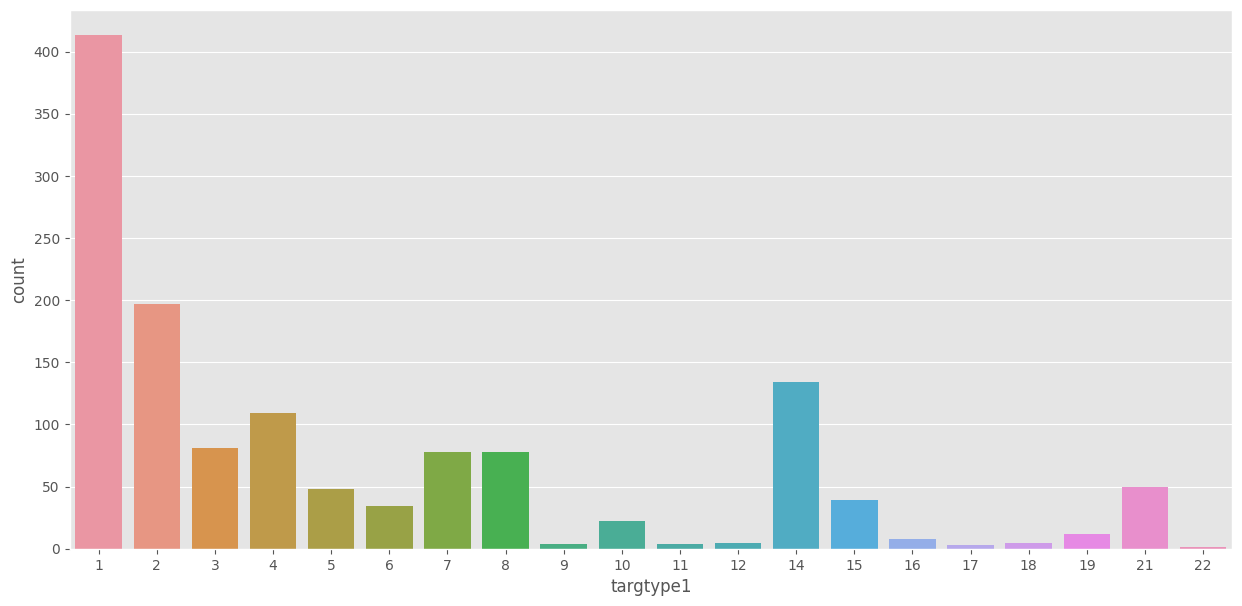

In [ ]:
visualization = us_df[us_df['attacktype1'] == 3]
sns.countplot(x = 'targtype1', data = visualization)

<Axes: xlabel='targtype1', ylabel='count'>

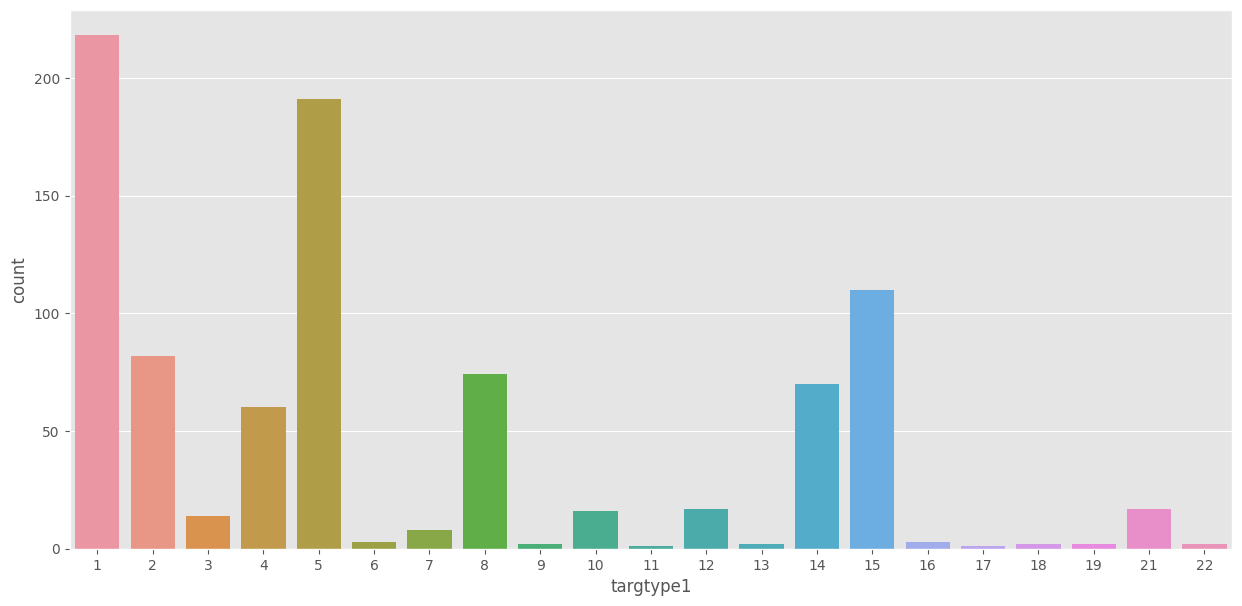

In [ ]:
visualization2 = us_df[us_df['attacktype1'] == 7]
sns.countplot(x = 'targtype1', data = visualization2)

<Axes: xlabel='targtype1', ylabel='count'>

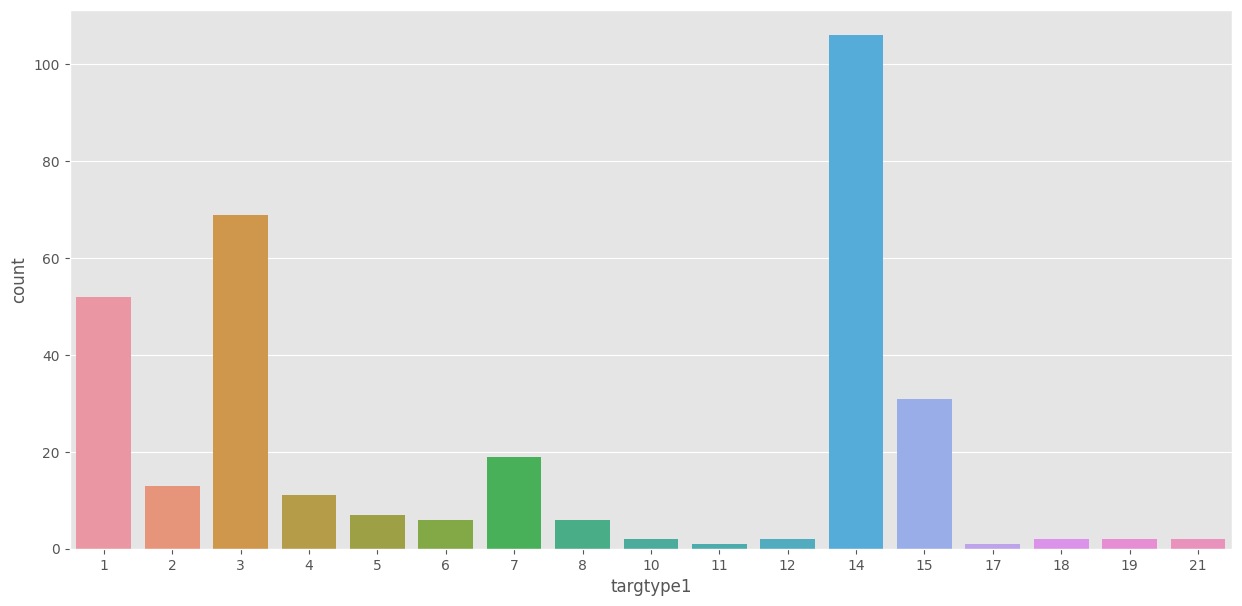

In [ ]:
visualization3 = us_df[us_df['attacktype1'] == 2]
sns.countplot(x = 'targtype1', data = visualization3)

# Data Splitting & Rebalancing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
project_df = us_df

In [ ]:
project_df.drop(['iyear','city','gname','crit1','crit2','crit3', 'property', 'success'], axis=1, inplace = True)

<ipython-input-27-16dccb23c659>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  project_df.drop(['iyear','city','gname','crit1','crit2','crit3', 'property', 'success'], axis=1, inplace = True)


In [ ]:
project_df.columns

Index(['imonth', 'provstate', 'attacktype1', 'targtype1', 'targsubtype1',
       'weaptype1'],
      dtype='object')

In [ ]:
project_df

,imonth,provstate,attacktype1,targtype1,targsubtype1,weaptype1
5,1,Illinois,2,3,22.0,5
7,1,California,3,21,107.0,6
8,1,Wisconsin,7,4,28.0,8
9,1,Wisconsin,7,2,21.0,8
10,1,Wisconsin,3,4,27.0,6
...,...,...,...,...,...,...
200720,12,New Jersey,2,1,7.0,5
200762,12,New Jersey,7,15,86.0,8
200971,12,South Carolina,7,15,86.0,8
201058,12,Georgia,7,15,86.0,8


In [ ]:
project_df = pd.get_dummies(us_df, columns=['provstate'], prefix = ['dummy'])

In [ ]:
project_df.shape

(2881, 59)

In [ ]:
terror_train1, terror_test1 = train_test_split(project_df, test_size =0.30, random_state = 7)

In [ ]:
print(terror_test1.shape)
print(terror_train1.shape)

(865, 59)
(2016, 59)


In [ ]:
# balance the dataset
print(terror_train1['attacktype1'].count())
terror_train1['attacktype1'].value_counts()

2016


3    936
7    633
2    220
1     93
8     56
5     42
6     14
4     13
9      9
Name: attacktype1, dtype: int64

In [ ]:
to_resample = project_df.loc[project_df['attacktype1'] == 6]
to_resample.info()

our_resample = to_resample.sample(n = 25 , replace = True)

# check the resampled set
our_resample.info()

# add the resampled data to the training set
terror_train1_rebal = pd.concat([terror_train1, our_resample])
terror_train1_rebal.info()

In [ ]:
to_resample = project_df.loc[project_df['attacktype1'] == 4]
to_resample.info()
our_resample = to_resample.sample(n = 25, replace = True)

# check the resampled set
our_resample.info()
terror_train1_rebal = pd.concat([terror_train1_rebal, our_resample])
terror_train1_rebal.info()

In [ ]:
to_resample = project_df.loc[project_df['attacktype1'] == 9]
to_resample.info()
our_resample = to_resample.sample(n = 25 , replace = True)

# check the resampled set
our_resample.info()
terror_train1_rebal = pd.concat([terror_train1_rebal, our_resample])
terror_train1_rebal.info()

In [ ]:
print(terror_train1_rebal['attacktype1'].count())
terror_train1_rebal['attacktype1'].value_counts()

2091


3    936
7    633
2    220
1     93
8     56
5     42
6     39
4     38
9     34
Name: attacktype1, dtype: int64

# Baseline

In [ ]:
terror_train1_rebal['attacktype1'].value_counts()

3    936
7    633
2    220
1     93
8     56
5     42
6     39
4     38
9     34
Name: attacktype1, dtype: int64

Since '3' (bombing/explosion) is the most occurring value for this target attribute we will use that as the prediction for our test set.

Our baseline model would correctly classify 936 test sets and incorrectly classify 1155 (2091 - 936).

Our accuracy is around 44.76%.

# Modeling

## Splitting Data

In [ ]:
x = terror_train1_rebal.drop(columns=['attacktype1'])

In [ ]:
y = terror_train1_rebal['attacktype1']

In [ ]:
x_test = terror_test1.drop(columns=['attacktype1'])

In [ ]:
y_test = terror_test1['attacktype1']

## Models using training set (Decision Trees & K-Nearest Neighbors)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
cart01 = DecisionTreeClassifier(max_leaf_nodes=5).fit(x,y)
rf01 = RandomForestClassifier(n_estimators = 10,criterion="gini").fit(x,y)

In [ ]:
prediction_cart01 = cart01.predict(x)
prediction_rf01 = rf01.predict(x)

In [ ]:
def eval_prediction(pred, actual):
    index = 0
    correct = 0
    for outcome in actual:
        if pred[index] == outcome:
            correct += 1

        index+=1
    return correct

In [ ]:
print("CART:", eval_prediction(prediction_cart01, y))
print("Random Forest:", eval_prediction(prediction_rf01, y))

CART: 1752
Random Forest: 2066


In [ ]:
print("CART:", '{0:.2f}'.format((eval_prediction(prediction_cart01, y)/len(x))*100),"%")
print("Random Forest:", '{0:.2f}'.format((eval_prediction(prediction_rf01, y)/len(x))*100),"%")

CART: 83.79 %
Random Forest: 98.80 %


In [ ]:
print(cart01.score(x,y))
print(rf01.score(x,y))

0.8378766140602583
0.9880439980870397


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(10)
clf = clf.fit(x,y)
pred = clf.predict(x)
acc = accuracy_score(pred,y)
print(acc)
print(f'K-Nearest Neighbors: {acc*100}%')

0.7977044476327116
K-Nearest Neighbors: 79.77044476327116%


In [ ]:
print("K-Nearest Neighbors:", eval_prediction(pred, y))

K-Nearest Neighbors: 1668


## Models using test set (Decision Trees & K-Nearest Neighbors)

In [ ]:
cart_predict = cart01.predict(x_test)
rf_predict =  rf01.predict(x_test)

In [ ]:
print("CART (test):", eval_prediction(cart_predict, y_test))
print("Random Forest (test):", eval_prediction(rf_predict, y_test))

CART (test): 732
Random Forest (test): 737


In [ ]:
print("CART:", '{0:.2f}'.format((eval_prediction(cart_predict, y_test)/len(x))*100),"%")
print("Random Forest:", '{0:.2f}'.format((eval_prediction(rf_predict, y_test)/len(x))*100),"%")

CART: 35.01 %
Random Forest: 35.25 %


In [ ]:
pred_test = clf.predict(x_test)
acc_test = accuracy_score(pred_test,y_test)
print(acc_test)
print(f'K-Nearest Neighbors: {acc_test*100}%')

0.7502890173410405
K-Nearest Neighbors: 75.02890173410405%


In [ ]:
print("K-Nearest Neighbors (test):", eval_prediction(pred_test, y_test))

K-Nearest Neighbors (test): 649


## Cross Validation (Decision Trees)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k = 10
crossvalidation = KFold(n_splits=k, random_state=1, shuffle=True)

In [ ]:
cart_cv_scores = cross_val_score(cart01, x_test, y_test, cv=crossvalidation)

print("Cart cross validation scores with k=10: ", cart_cv_scores)
print("Average score of all folds:",cart_cv_scores.mean())

Cart cross validation scores with k=10:  [0.83908046 0.85057471 0.83908046 0.85057471 0.93103448 0.8372093
 0.87209302 0.8372093  0.81395349 0.90697674]
Average score of all folds: 0.8577786688051322


In [ ]:
rf01_cv_scores = cross_val_score(rf01, x, y, cv=crossvalidation)

print("Random Forest cross validation scores with k=10: ", rf01_cv_scores)
print("Average score of all folds:",rf01_cv_scores.mean())

Random Forest cross validation scores with k=10:  [0.87619048 0.87559809 0.8708134  0.83253589 0.85167464 0.9138756
 0.85167464 0.88038278 0.87559809 0.88038278]
Average score of all folds: 0.8708726361357939


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB() # default params - MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
nb_model.fit(x, y)

MultinomialNB()

In [ ]:
print(nb_model.score(x,y))

0.34433285509325684


In [ ]:
print(nb_model.score(x_test,y_test))

0.3202312138728324


In [ ]:
y_predicted = nb_model.predict(x_test)
ypred = pd.crosstab(y_test, y_predicted, rownames = ['Actual'], colnames = ['Predicted'])
ypred['Total'] = ypred.sum(axis=1)
ypred.loc['Total'] = ypred.sum()
ypred

Predicted,1,2,3,5,7,9,Total
Actual,,,,,,,
1,1,18,15,0,4,0,38
2,5,39,42,5,12,9,112
3,18,46,163,25,43,94,389
4,0,1,1,0,2,0,4
5,0,1,5,6,0,12,24
6,0,2,4,0,2,0,8
7,11,43,63,9,67,69,262
8,0,7,9,2,7,1,26
9,0,0,0,0,1,1,2


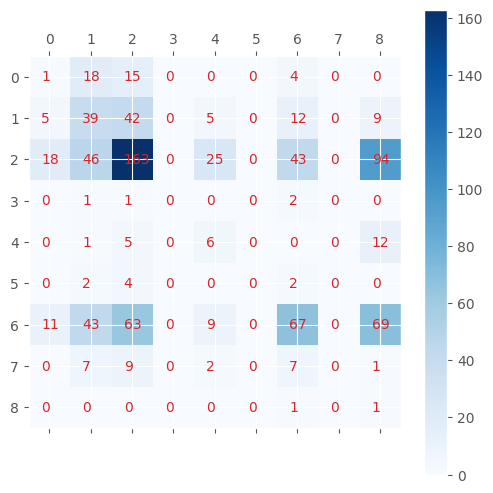

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    #print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(9), range(9))
    plt.xticks(range(9), range(9))
    plt.colorbar();
    for i in range(9):
        for j in range(9):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')

plot_confusion_matrix(y_test, nb_model.predict(x_test))

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=10, verbose=5)
multinomial_nb_grid.fit(x,y)

print('Train Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(x, y))
print('Test Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(x_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%multinomial_nb_grid.best_score_)
print('Best Parameters : ',multinomial_nb_grid.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Train Accuracy : 0.499
Test Accuracy : 0.499
Best Accuracy Through Grid Search : 0.487
Best Parameters :  {'alpha': 10.0}


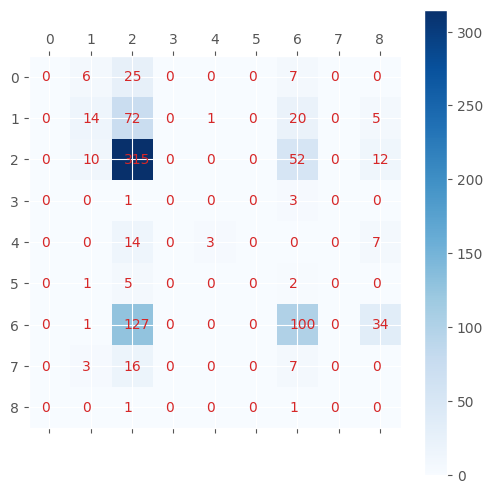

In [ ]:
plot_confusion_matrix(y_test, multinomial_nb_grid.best_estimator_.predict(x_test))

# Evaluation Second Look

In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Let's try Decision Tree


# Summary of the predictions made by the classifier
print(classification_report(y_test, cart_predict))
print('Confusion Matrix')
print(confusion_matrix(y_test, cart_predict))
# Accuracy score
print('accuracy is',accuracy_score(cart_predict,y_test))

test_predictions_proba = nb_model.predict_proba(x_test)
ll = log_loss(y_test, test_predictions_proba)
print("Log Loss: {:.4}".format(ll))
print("="*30)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        38
           2       0.64      0.82      0.72       112
           3       0.96      0.98      0.97       389
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        24
           6       0.00      0.00      0.00         8
           7       0.93      0.93      0.93       262
           8       0.74      0.54      0.62        26
           9       0.04      1.00      0.08         2

    accuracy                           0.85       865
   macro avg       0.37      0.47      0.37       865
weighted avg       0.82      0.85      0.83       865

Confusion Matrix
[[  0  21  11   0   0   0   1   0   5]
 [  0  92   0   0   0   0  10   0  10]
 [  0   0 381   0   0   0   7   1   0]
 [  0   1   1   0   0   0   0   0   2]
 [  0  19   2   0   0   0   0   0   3]
 [  0   5   0   0   0   0   0   0   3]
 [  0   6   0   0   0   0 243   4   9]
 [  0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Let's try Random Forest as a second model

# Summary of the predictions made by the classifier
print(classification_report(y_test, rf_predict))
print('Confusion Matrix')
print(confusion_matrix(y_test, rf_predict))
# Accuracy score
print('accuracy is',accuracy_score(rf_predict,y_test))

test_predictions_proba = nb_model.predict_proba(x_test)
ll = log_loss(y_test, test_predictions_proba)
print("Log Loss: {:.4}".format(ll))
print("="*30)

              precision    recall  f1-score   support

           1       0.21      0.24      0.23        38
           2       0.70      0.57      0.63       112
           3       0.95      0.97      0.96       389
           4       0.80      1.00      0.89         4
           5       0.75      0.50      0.60        24
           6       0.36      0.50      0.42         8
           7       0.89      0.95      0.92       262
           8       0.62      0.50      0.55        26
           9       1.00      1.00      1.00         2

    accuracy                           0.85       865
   macro avg       0.70      0.69      0.69       865
weighted avg       0.85      0.85      0.85       865

Confusion Matrix
[[  9   9  10   0   0   3   4   3   0]
 [ 23  64   2   0   4   4  10   5   0]
 [  1   1 379   1   0   0   7   0   0]
 [  0   0   0   4   0   0   0   0   0]
 [  3   6   2   0  12   0   1   0   0]
 [  2   1   0   0   0   4   1   0   0]
 [  3   6   3   0   0   0 250   0   0]
 [  1

In [ ]:
# K-Nearest Neighbors as third model

# Summary of the predictions made by the classifier
print(classification_report(y_test, pred_test))
print('Confusion Matrix')
print(confusion_matrix(y_test, pred_test))
# Accuracy score
print('accuracy is',accuracy_score(pred_test,y_test))

test_predictions_proba = nb_model.predict_proba(x_test)
ll = log_loss(y_test, test_predictions_proba)
print("Log Loss: {:.4}".format(ll))
print("="*30)

              precision    recall  f1-score   support

           1       0.13      0.05      0.08        38
           2       0.65      0.42      0.51       112
           3       0.74      0.92      0.82       389
           4       0.30      0.75      0.43         4
           5       1.00      0.17      0.29        24
           6       0.14      0.12      0.13         8
           7       0.86      0.85      0.86       262
           8       0.67      0.31      0.42        26
           9       0.25      0.50      0.33         2

    accuracy                           0.75       865
   macro avg       0.53      0.46      0.43       865
weighted avg       0.74      0.75      0.73       865

Confusion Matrix
[[  2   3  24   1   0   1   4   3   0]
 [  5  47  44   2   0   4   9   1   0]
 [  5   9 359   2   0   1  13   0   0]
 [  0   0   0   3   0   0   1   0   0]
 [  0   2  17   0   4   0   0   0   1]
 [  0   1   4   0   0   1   2   0   0]
 [  1   4  32   0   0   0 224   0   1]
 [  2

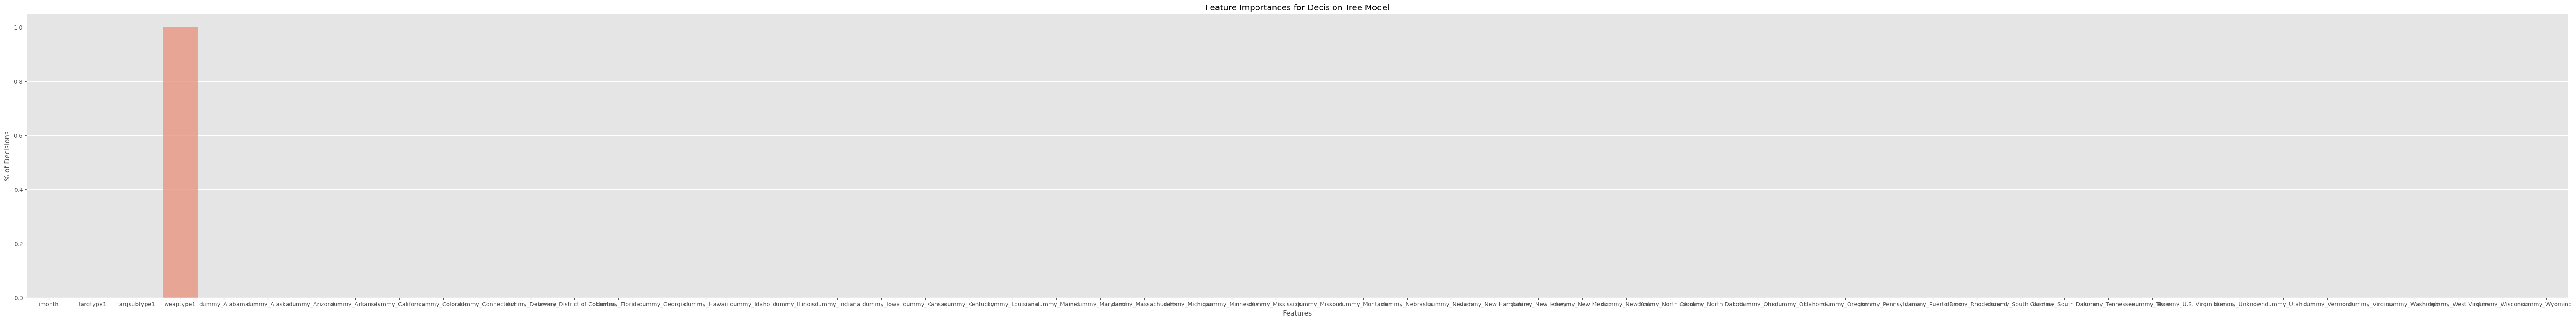

In [ ]:
feature_importances = cart01.feature_importances_
plt.figure(figsize=(80,9))
sns.barplot(x=x.columns,y=feature_importances,alpha=0.8)
plt.xlabel('Features')
plt.ylabel('% of Decisions')
plt.title('Feature Importances for Decision Tree Model')
plt.show()

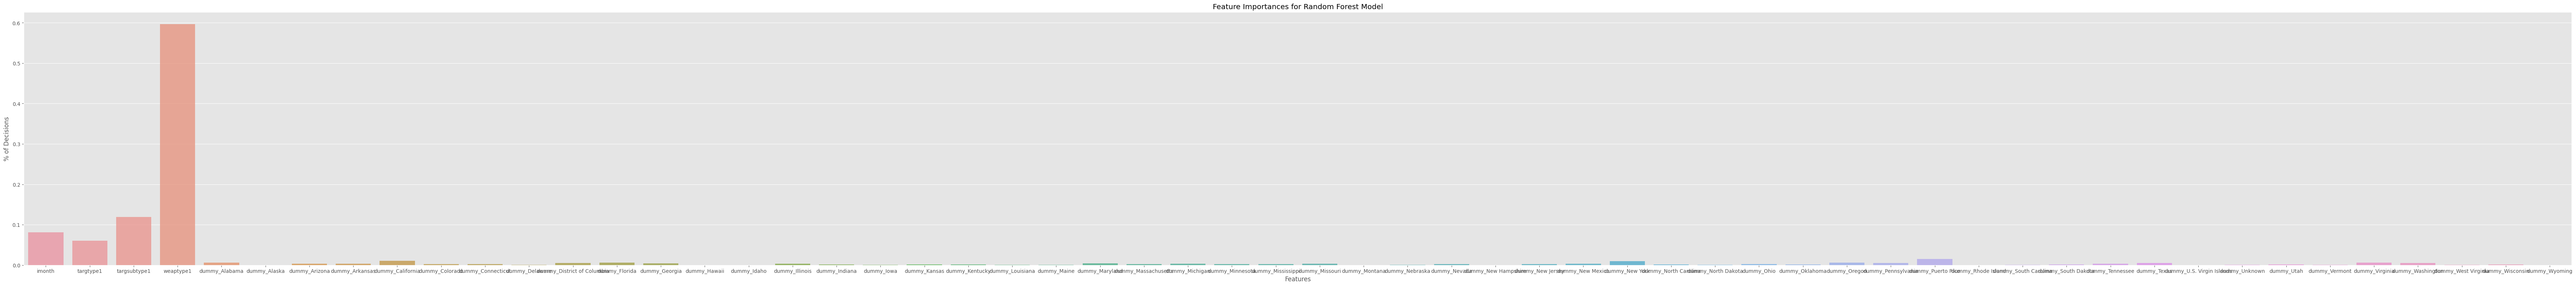

In [ ]:
feature_importances = rf01.feature_importances_
plt.figure(figsize=(90,9))
sns.barplot(x=x.columns,y=feature_importances,alpha=0.8)
plt.xlabel('Features')
plt.ylabel('% of Decisions')
plt.title('Feature Importances for Random Forest Model')
plt.show()

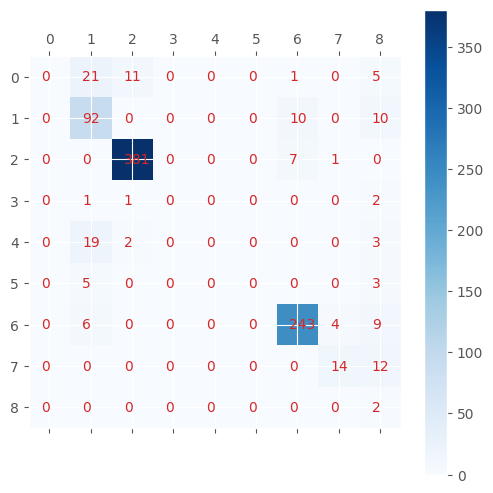

In [ ]:
plot_confusion_matrix(y_test, cart_predict)

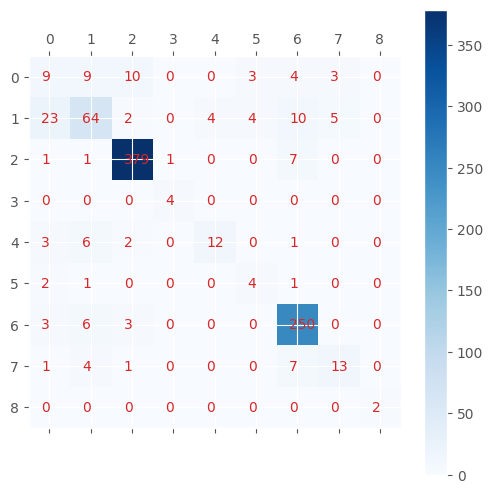

In [ ]:
plot_confusion_matrix(y_test, rf_predict)

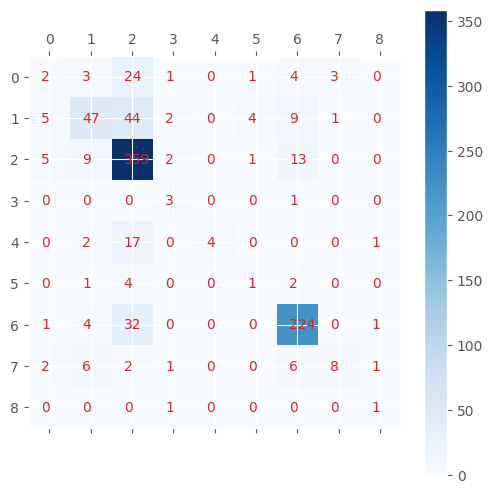

In [ ]:
plot_confusion_matrix(y_test, pred_test)